In [1]:
#Importing the important packages needed for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data set

haberman_data = pd.read_csv("haberman.csv", header=None)  #Using 'header=None' so that first record is not overwritten when column names will be added.
haberman_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
haberman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
0    306 non-null int64
1    306 non-null int64
2    306 non-null int64
3    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute):          
   a) 1 = the patient survived 5 years or longer        
   b) 2 = the patient died within 5 year         
5. There are no null/missing values in the data

In [4]:
haberman_data.columns = ["Age", "Year", "positive_nodes", "Survival_stats"]
haberman_data.tail()

,Age,Year,positive_nodes,Survival_stats
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
haberman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Year              306 non-null int64
positive_nodes    306 non-null int64
Survival_stats    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
haberman_data['Survival_stats'].value_counts()

1    225
2     81
Name: Survival_stats, dtype: int64

#### Few observations till now:        
Number of data points/ data observations/ vectors: 306         
Number of Features/ input variables/ independant variables: 3         
Number of classes/ labels/ dependant variables/ output variables: 2         
Data Points per class: 225 survived more than 5 years and 81 didn't survive for more than 5 years.         

#### Our objective is to predict the survival of the patients who had undergone surgery for breast cancer.

## Univariate Analysis

In [7]:
haberman_data_survival = haberman_data.loc[haberman_data['Survival_stats']==1]
haberman_data_no_survival = haberman_data.loc[haberman_data['Survival_stats']==2]

##### Probability Density Function Analysis

AGE

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

 [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


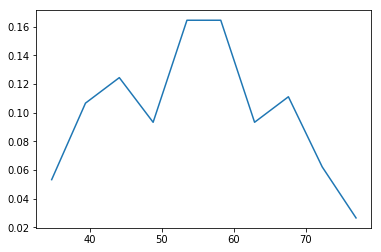

In [8]:
counts, bin_edges = np.histogram(haberman_data_survival["Age"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]

 [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


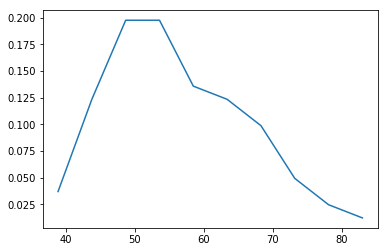

In [9]:
counts, bin_edges = np.histogram(haberman_data_no_survival["Age"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

YEAR

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]

 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


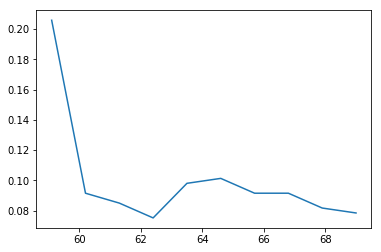

In [10]:
counts, bin_edges = np.histogram(haberman_data["Year"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


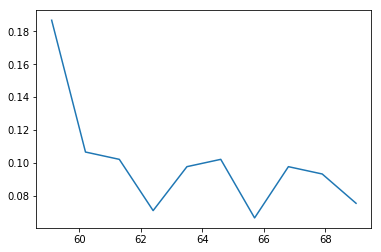

In [11]:
counts, bin_edges = np.histogram(haberman_data_survival["Year"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]

 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


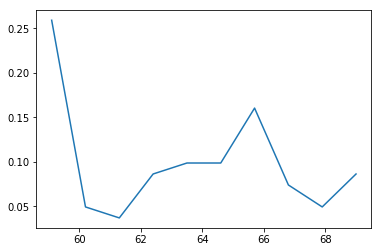

In [12]:
counts, bin_edges = np.histogram(haberman_data_no_survival["Year"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

POSITIVE AXILLARY NODES: Number of positive axillary nodes detected to which cancer can spread

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]

 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


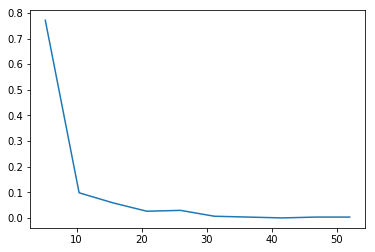

In [13]:
counts, bin_edges = np.histogram(haberman_data["positive_nodes"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


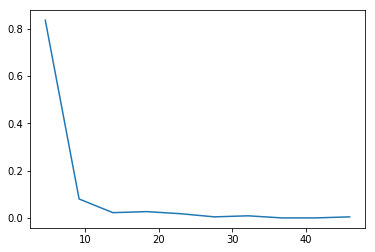

In [14]:
counts, bin_edges = np.histogram(haberman_data_survival["positive_nodes"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


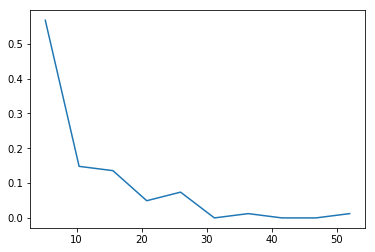

In [15]:
counts, bin_edges = np.histogram(haberman_data_no_survival["positive_nodes"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.show()

##### Cumulative Distribution Function Analysis

AGE

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]

 [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


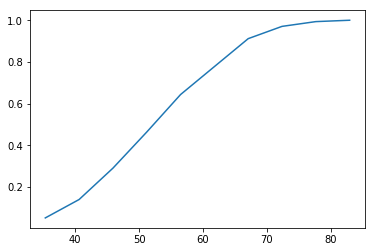

In [16]:
counts, bin_edges = np.histogram(haberman_data["Age"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], cdf)
plt.show()

YEAR

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]

 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


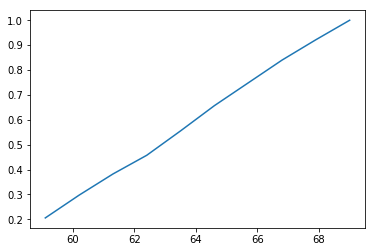

In [17]:
counts, bin_edges = np.histogram(haberman_data["Year"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], cdf)
plt.show()

POSITIVE AXILLARY NODES

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]

 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


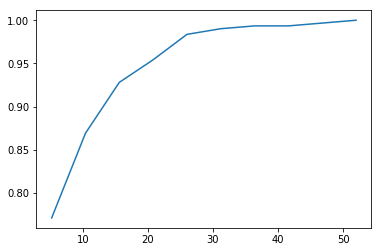

In [18]:
counts, bin_edges = np.histogram(haberman_data["positive_nodes"], bins=10, density=True)

pdf = counts/sum(counts)
print(pdf)
print("\n", bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], cdf)
plt.show()

##### Box Plots

AGE

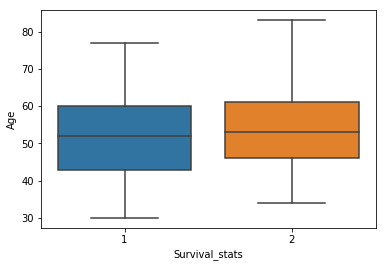

In [19]:
sns.boxplot(x='Survival_stats', y='Age', data=haberman_data)
plt.show()

YEAR

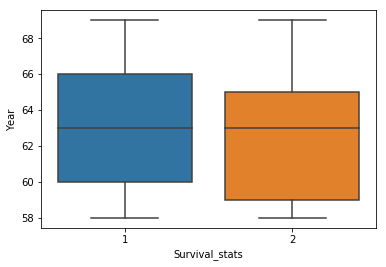

In [20]:
sns.boxplot(x='Survival_stats', y='Year', data=haberman_data)
plt.show()

POSITIVE AXILLARY NODES

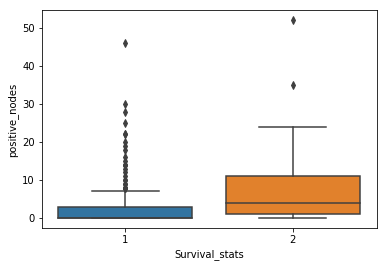

In [21]:
sns.boxplot(x='Survival_stats', y='positive_nodes', data=haberman_data)
plt.show()

##### Violin Plots

AGE

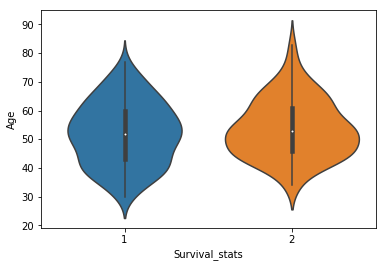

In [22]:
sns.violinplot(x='Survival_stats', y='Age', data=haberman_data, size=8)
plt.show()

YEAR

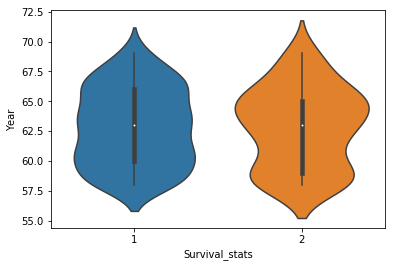

In [23]:
sns.violinplot(x='Survival_stats', y='Year', data=haberman_data, size=8)
plt.show()

POSITIVE AXILLARY NODES

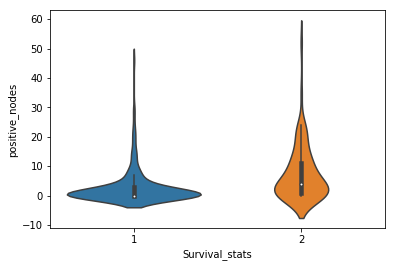

In [24]:
sns.violinplot(x='Survival_stats', y='positive_nodes', data=haberman_data, size=8)
plt.show()

## Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


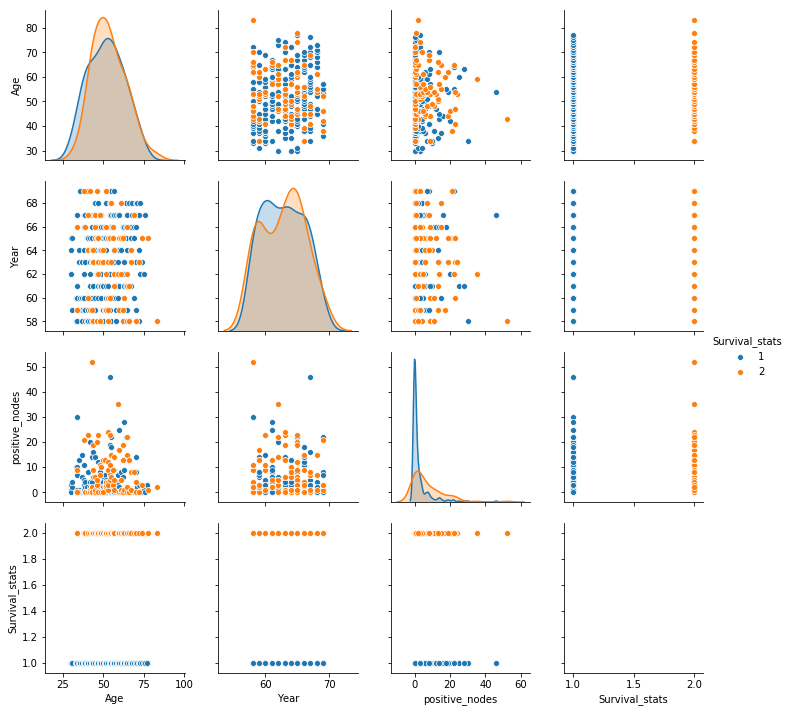

In [25]:
# pairplot for numerical data, countplot for categorical data

sns.pairplot(haberman_data, hue='Survival_stats')

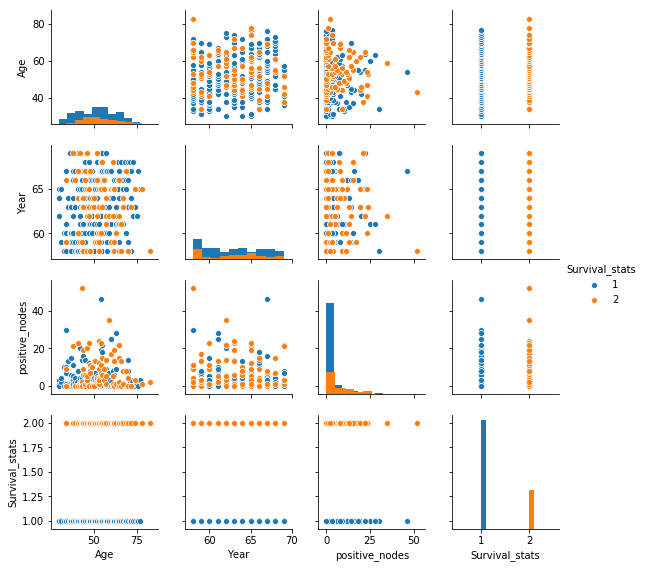

In [26]:
sns.pairplot(haberman_data, hue='Survival_stats', diag_kind="hist", height=2)

## Observations/ Conclusions

The given dataset is not much informative. The dataset is imbalanced. The features of the given two classes are overlapping each other. No model can be made since we did not find any specific if-else conditions. Scope: By doing Multivariate analysis using Machine Learning, more information can be found out.